# Import Data from Web

## 1. 웹 저장소에 있는 flat file 가져오기

In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [2]:
# 레드 와인의 물리화학적 성분과 품질 등급 : University of California, Irvine
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

로컬에 파일로 저장한 후 데이터 읽기

In [3]:
urlretrieve(url, 'data/winequality-red.csv')

('data/winequality-red.csv', <http.client.HTTPMessage at 0x124e4764710>)

In [4]:
df = pd.read_csv('data/winequality-red.csv', sep=';')  # 로컬 파일 읽기
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


파일을 로컬로 저장하지 않고 웹에서 바로 데이터프레임으로 읽기

In [5]:
df2 = pd.read_csv(url, sep=';')
df2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

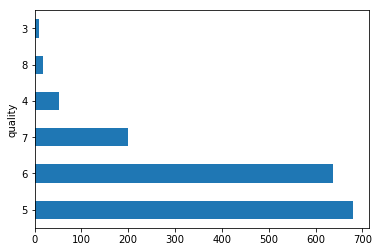

In [7]:
df['quality'].value_counts().plot(kind='barh')
plt.ylabel('quality')

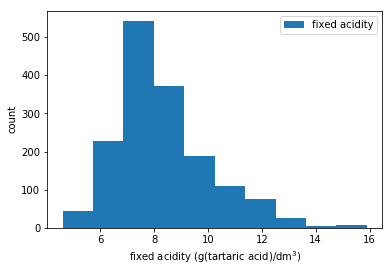

In [8]:
df.ix[:, 0:1].plot(kind='hist')
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')

## 2. 웹 저장소에 있는 excel file 가져오기

In [9]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

In [10]:
xl = pd.read_excel(url, sheetname=None)  # all sheets

xl.keys()   # sheet names

dict_keys(['1700', '1900'])

In [11]:
xl['1700'].head()

,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


## 3. HTTP requests : requests

In [12]:
import requests

In [13]:
url = 'http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259'

r = requests.get(url)

text = r.text
text = "".join(text.split('\r\n'))    # 텍스트를 쪼갠 후 다시 합침.
text[:1000]

'<!DOCTYPE HTML> <html lang="ko"> <head><meta charset="euc-kr"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="refresh" content="600" /><meta name="viewport" content="width=1023" />                                                                                                                                                                                                                                                                                                                                                                                    <meta property="og:title"       content="경제 금융 : 네이버뉴스"><meta property="og:type"        content="website"><meta property="og:url"         content="http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259"><meta property="og:image"       content="http://static.news.naver.net/image/news/ogtag/navernews_200x200_20160804.png"/><meta property="og:description" content="각 언론사별 금융 기사 제공"><meta name="twitter:card"\

## 4. BeautifulSoup : HTML parsing

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'http://finance.naver.com/news/news_list.nhn?mode=LSS2D&section_id=101&section_id2=258'  # 네이버 금융 뉴스

r = requests.get(url)
html_doc = r.text

In [16]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html_doc, "lxml")
pretty_soup = soup.prettify()
pretty_soup = "".join(pretty_soup.split('\n'))
pretty_soup[0:2000]

'<!--  global include --><html lang="ko"> <head>  <title>   네이버 금융  </title>  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>  <meta content="text/javascript" http-equiv="Content-Script-Type"/>  <meta content="text/css" http-equiv="Content-Style-Type"/>  <meta content="http://finance.naver.com/news/news_list.nhn?mode=LSS2D&amp;section_id=101&amp;section_id2=258&amp;type=0" property="og:url"/>  <meta content="실시간 속보 : 네이버 금융" property="og:title"/>  <meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>  <meta content="http://static.naver.net/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>  <meta content="article" property="og:type"/>  <meta content="" property="og:article:thumbnailUrl"/>  <meta content="네이버금융" property="og:article:author"/>  <meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>  <link href="http://finance.naver.com/css/finance_header.css?20170323063447" rel="stylesheet" type="text/css"/>  <link href=

In [17]:
page_title = soup.title
page_title

<title>네이버 금융</title>

In [18]:
# 'a' 태그 검색
a_tags = soup.find_all('a')

for link in a_tags:
    title = link.get('title')
    href = link.get('href')
    if (href.find('LSS3D') > 0) & (title != None):   # 타이틀이 있고 특정 단어 포함한 링크만 출력
        print(link.get('title'))
        print(link.get('href'))

[주간추천주]신한금융투자
/news/news_read.nhn?article_id=0003794235&office_id=018&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
"코스닥과 중소형주 강세 5월까지 지속될 것"
/news/news_read.nhn?article_id=0003970489&office_id=277&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
[M&A의 비밀①]역사상 국내 최대 M&A는?
/news/news_read.nhn?article_id=0003794196&office_id=018&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
물류수송 편리한 산업단지 ‘의왕테크노파크’, 수도권 기업체 관심
/news/news_read.nhn?article_id=0003010459&office_id=011&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
다음주 코스피 2130~2180 전망…美 재무부 환율보고서 불확실성
/news/news_read.nhn?article_id=0003970473&office_id=277&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
[뉴욕증시 마감] 시리아 공습·부진한 고용지표에 약보합
/news/news_read.nhn?article_id=0003794158&office_id=018&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
[M&A의 비밀②]M&A로 성장한 국내 최대 기업은?
/news/news_read.nhn?article_id=0003794155&office_id=018&mode=LSS3D&type=0

## 5. lxml.html 사용 - 네이버 뉴스 검색

<a class="> : 링크에 class 태그 있는 경우

In [36]:
import requests
import lxml.html
from urllib.parse import quote_plus

In [37]:
# 검색단어. 네이버는 인코딩을 바꿔주어야 한다.
word = '딥러닝'
word_percent = quote_plus(word.encode('cp949'))

In [38]:
# 날짜 범위
startDate = '2017-04-01'
endDate = '2017-04-07'

In [39]:
url = ('http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper='
       '&stRelease=&ie=MS949&detail=0&rcsection=&sm=all.basic&pd=4&'
       'query={query}&startDate={start}&endDate={end}&page={page}')

url.format(query=word_percent, start=startDate, end=endDate, page=1)

'http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&sm=all.basic&pd=4&query=%B5%F6%B7%AF%B4%D7&startDate=2017-04-01&endDate=2017-04-07&page=1'

In [41]:
# 뉴스 기사 크롤링 - 5 페이지
articles = []

for page in range(1, 5): 
    page_url = url.format(query=word_percent, start=startDate, end=endDate, page=page)
    res = requests.get(page_url)
    root = lxml.html.fromstring(res.text)
    titles = root.cssselect('a.go_naver')
    for title in titles:
        article_url = title.attrib['href']
        art_res = requests.get(article_url)
        art_root = lxml.html.fromstring(art_res.text)
        body = art_root.cssselect('#articleBodyContents')[0]
        articles.append(body.text_content())

In [42]:
len(articles)

32

In [43]:
articles[0]

'\n\t\n\t\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n\t\n\t"프리퍼드네트웍스와 \'체이너\' 프레임워크 공동 개발"(지디넷코리아=임민철 기자)[도쿄(일본)=임민철 기자]인텔이 딥러닝 분야에서 구글과 경쟁하는 기술을 개발하고 있다는 일본의 스타트업 \'프리퍼드네트웍스(PFN)\'와 협력하기로 했다.인텔은 6일 일본 도쿄에서 PFN이라는 현지 스타트업과 함께 \'체이너(Chainer)\'라는 오픈소스 딥러닝 프레임워크를 개발하기로 했다고 밝혔다. 이 발표는 AI 시장 대응을 위한 사업전략 및 관련 기술 로드맵을 소개하는 \'인텔AI데이\' 컨퍼런스를 진행하면서 나왔다.체이너는 PFN이 지난 2015년 6월 오픈소스로 공개한 파이썬 기반의 프레임워크다. 인텔은 앞으로 체이너 프레임워크 개발을 위해 PFN와 협력한다. 체이너를 통해 인텔 아키텍처 기반의 범용 컴퓨팅 인프라에서 딥러닝의 성능을 끌어낼 수 있는 결과물을 제공하겠다는 계획이다.                      인텔이 2017년 4월 6일 일본 도쿄 AI데이 현장에서 딥러닝 스타트업 프리퍼드네트웍스(PFN)가 만든 오픈소스 프레임워크 체이너(Chainer)를 함께 개발하기로 했다고 발표했다.양사 협력은 다음 5가지 활동으로 구체화한다. 첫째, 인텔아키텍처 기반 체이너 성능을 지속 최적화한다. 둘째, 체이너 업데이트에 지속 대응한다. 셋째, 범용 컴퓨팅, 가속기, 라이브러리 등을 포함한 인텔 아키텍처에 체이너를 최적화해 지속 갱신한다. 넷째, 양사 협력의 결과를 인텔의 깃허브 프로젝트 저장소 커뮤니티와 공유한다. 다섯째, AI 및 딥러닝 시장 성장을 앞당길 마케팅에 힘을 모은다.인텔은 제온, 제온파이, 아리아(Arria) 10 FPGA 시리즈, 너바나(Nervana)를 비롯한 주요 프로세서 제품을 AI 시대에 걸맞는 솔루션의 일부로 내걸고 있다. 체이너 프레임워크는 이런 AI용 하드웨어 솔루션의 성능을 

In [48]:
# 불필요한 내용 제거
articles[0].replace('flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}', '').replace('\n','').replace('\t','')

'// "프리퍼드네트웍스와 \'체이너\' 프레임워크 공동 개발"(지디넷코리아=임민철 기자)[도쿄(일본)=임민철 기자]인텔이 딥러닝 분야에서 구글과 경쟁하는 기술을 개발하고 있다는 일본의 스타트업 \'프리퍼드네트웍스(PFN)\'와 협력하기로 했다.인텔은 6일 일본 도쿄에서 PFN이라는 현지 스타트업과 함께 \'체이너(Chainer)\'라는 오픈소스 딥러닝 프레임워크를 개발하기로 했다고 밝혔다. 이 발표는 AI 시장 대응을 위한 사업전략 및 관련 기술 로드맵을 소개하는 \'인텔AI데이\' 컨퍼런스를 진행하면서 나왔다.체이너는 PFN이 지난 2015년 6월 오픈소스로 공개한 파이썬 기반의 프레임워크다. 인텔은 앞으로 체이너 프레임워크 개발을 위해 PFN와 협력한다. 체이너를 통해 인텔 아키텍처 기반의 범용 컴퓨팅 인프라에서 딥러닝의 성능을 끌어낼 수 있는 결과물을 제공하겠다는 계획이다.                      인텔이 2017년 4월 6일 일본 도쿄 AI데이 현장에서 딥러닝 스타트업 프리퍼드네트웍스(PFN)가 만든 오픈소스 프레임워크 체이너(Chainer)를 함께 개발하기로 했다고 발표했다.양사 협력은 다음 5가지 활동으로 구체화한다. 첫째, 인텔아키텍처 기반 체이너 성능을 지속 최적화한다. 둘째, 체이너 업데이트에 지속 대응한다. 셋째, 범용 컴퓨팅, 가속기, 라이브러리 등을 포함한 인텔 아키텍처에 체이너를 최적화해 지속 갱신한다. 넷째, 양사 협력의 결과를 인텔의 깃허브 프로젝트 저장소 커뮤니티와 공유한다. 다섯째, AI 및 딥러닝 시장 성장을 앞당길 마케팅에 힘을 모은다.인텔은 제온, 제온파이, 아리아(Arria) 10 FPGA 시리즈, 너바나(Nervana)를 비롯한 주요 프로세서 제품을 AI 시대에 걸맞는 솔루션의 일부로 내걸고 있다. 체이너 프레임워크는 이런 AI용 하드웨어 솔루션의 성능을 최대한 끌어낼 수 있는 인텔 매쓰커널라이브러리(MKL) 및 MKL 딥뉴럴넷(DNN) 등 오픈소스소프트웨어 라이브러리를 기본 구성요소로 활용할 예정이다.  

## 6. API & JSON

### Open Movie Database (OMDB) API 통해 영화 정보 가져오기

In [19]:
import requests

In [20]:
url = 'http://www.omdbapi.com/?t=avengers'
r = requests.get(url)
r.text

'{"Title":"The Avengers","Year":"2012","Rated":"PG-13","Released":"04 May 2012","Runtime":"143 min","Genre":"Action, Sci-Fi","Director":"Joss Whedon","Writer":"Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)","Actors":"Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth","Plot":"Earth\'s mightiest heroes must come together and learn to fight as a team if they are to stop the mischievous Loki and his alien army from enslaving humanity.","Language":"English, Russian","Country":"USA","Awards":"Nominated for 1 Oscar. Another 35 wins & 77 nominations.","Poster":"https://images-na.ssl-images-amazon.com/images/M/MV5BMTk2NTI1MTU4N15BMl5BanBnXkFtZTcwODg0OTY0Nw@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.1/10"},{"Source":"Rotten Tomatoes","Value":"92%"},{"Source":"Metacritic","Value":"69/100"}],"Metascore":"69","imdbRating":"8.1","imdbVotes":"1,037,900","imdbID":"tt0848228","Type":"movie","DVD":"25 Sep 2012","BoxOffice":"$623,279,547.00","

In [21]:
json_data = r.json()

# json_data 의 키-값 출력
for k in json_data.keys():
    print(k + ': ', json_data[k])

Rated:  PG-13
Writer:  Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)
Language:  English, Russian
imdbVotes:  1,037,900
DVD:  25 Sep 2012
Response:  True
imdbRating:  8.1
Country:  USA
Actors:  Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth
Website:  http://marvel.com/avengers_movie
Title:  The Avengers
Released:  04 May 2012
Metascore:  69
BoxOffice:  $623,279,547.00
Awards:  Nominated for 1 Oscar. Another 35 wins & 77 nominations.
Type:  movie
Production:  Walt Disney Pictures
Director:  Joss Whedon
Ratings:  [{'Value': '8.1/10', 'Source': 'Internet Movie Database'}, {'Value': '92%', 'Source': 'Rotten Tomatoes'}, {'Value': '69/100', 'Source': 'Metacritic'}]
Runtime:  143 min
Year:  2012
Poster:  https://images-na.ssl-images-amazon.com/images/M/MV5BMTk2NTI1MTU4N15BMl5BanBnXkFtZTcwODg0OTY0Nw@@._V1_SX300.jpg
Genre:  Action, Sci-Fi
imdbID:  tt0848228
Plot:  Earth's mightiest heroes must come together and learn to fight as a team if they are to stop the mis

# 6. Tweeter API

* https://dev.twitter.com 접속 후 회원가입
* 오른쪽 위 "My Apps" 선택
* Create New App
* 각 항목 입력 후 등록
* Keys and Access Tokens 탭으로 이동

(콘솔에서) pip3 install tweepy

In [22]:
import tweepy
import json
import pandas as pd

In [23]:
# OAuth authentication credentials
access_token = "719707261-cihmPGdeBpPGF4TtNX8g9NfomwIlttTu2B309R0x"
access_token_secret = "W45XmzFmFZewfPWPNjrsScnFLYbZAyVyLCN5qrpxbSjr5"
consumer_key = "Bd9IuuquDvd34YEgohyfQLPuY"
consumer_secret = "dhxlKev5UPivv4vQMSOjmAXW3yXByTqM2Fj3rjI6uBvEVRPEdC"

# tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [24]:
# 트위터 데이터 스트리밍 리스너 클래스
class TweetStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(TweetStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")  # 로컬에 파일로 저장.

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [25]:
# 리스너 초기화
l = TweetStreamListener()
stream = tweepy.Stream(auth, l)


In [26]:
# 키워드
stream.filter(track=['clinton', 'trump', 'obama'])

In [27]:
tweets_data_file = 'tweets.txt'

tweets_data = []

# 파일을 읽어서 리스트에 담기
tweets_file = open(tweets_data_file, "r")

for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()

In [28]:
tweets_data[0].keys()

dict_keys(['contributors', 'retweet_count', 'timestamp_ms', 'place', 'text', 'retweeted', 'favorite_count', 'id_str', 'in_reply_to_user_id_str', 'entities', 'geo', 'id', 'lang', 'user', 'favorited', 'source', 'is_quote_status', 'in_reply_to_status_id_str', 'created_at', 'filter_level', 'retweeted_status', 'truncated', 'in_reply_to_user_id', 'in_reply_to_status_id', 'coordinates', 'in_reply_to_screen_name'])

In [29]:
df = pd.DataFrame(tweets_data, columns=['text', 'favorite_count','retweet_count', 'lang'])
df.head()

,text,favorite_count,retweet_count,lang
0,RT @willwilkinson: Whatever you thought was tr...,0,0,en
1,RT @DaShanneStokes: You may have been able to ...,0,0,en
2,RT @IngrahamAngle: Trump's America First agend...,0,0,en
3,https://t.co/IMyVMJVhJ2 - Baltimore police ove...,0,0,en
4,Was the US missile strike on Syria legal?: htt...,0,0,en


In [30]:
len(df)

99

In [31]:
import re

def word_in_text(word, tweet):   # 문장 속에 해당 단어가 있는지 확인.
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)
    
    if match:
        return True
    return False

In [32]:
[clinton, trump, obama] = [0, 0, 0]

for index, row in df.iterrows():
    #print(index, row['text'])
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    obama += word_in_text('obama', row['text'])

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

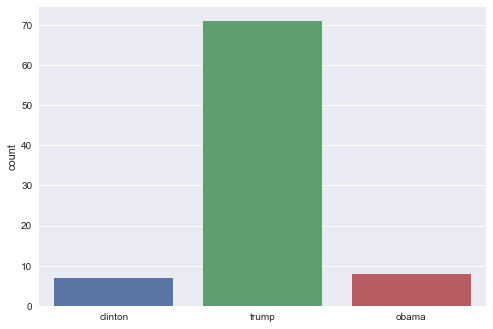

In [34]:
tx = sns.barplot(['clinton', 'trump', 'obama'], [clinton, trump, obama])
tx.set(ylabel="count")
plt.show()